In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
import matplotlib.gridspec as gridspec
#%matplotlib inline

load Data

In [2]:
wannier_xlat = np.loadtxt('../../Data/Wanner_3D_x.txt', delimiter = ',')
wannier_ylat = np.loadtxt('../../Data/Wanner_3D_y.txt', delimiter = ',')
wannier_lat = np.loadtxt('../../Data/Wanner_3D_rho.txt', delimiter = ',')

In [3]:
hartree = np.loadtxt('../../Data/mytable_Hartree.txt', delimiter = ',', skiprows = 2)
hartree_fock = np.loadtxt('../../Data/mytable_HartreeFock.txt', delimiter = ',', skiprows = 2)

plotting

In [5]:
plt.style.use('../aps1.mplstyle')

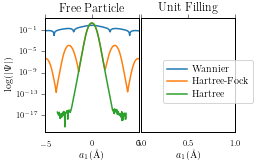

In [14]:
fig, ax = plt.subplots(1, 2) 
ax[0].semilogy(wannier_ylat[289,:], np.sqrt(wannier_lat[289,:]), label = "Wannier")
ax[0].semilogy(hartree_fock[:,0], (10**(hartree_fock[:,1])), label = "Hartree-Fock")
ax[0].semilogy(hartree[:,0], (10**(hartree[:,1])), label = "Hartree")
ax[0].set_xlim(-5, 5)
ax[0].set_title("Free Particle")
ax[0].set_xlabel(r'$a_1$(\AA)')
ax[0].set_ylabel(r'log($|\Psi|$)')

ax[1].set_yticks([])
ax[1].set_title("Unit Filling")
ax[1].set_xlabel(r'$a_1$(\AA)')

fig.subplots_adjust(wspace=0.03, right = 0.9)

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, loc='right', frameon = True)


#plt.legend()
#plt.show()

plt.savefig('WannierCut.pdf', transparent=False) 
plt.savefig('WannierCut.svg', transparent=False) 